# Loading Libraries

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [3]:
data <- read.csv("heart.csv")
head(data)

ï..age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [4]:
tail(data)

,ï..age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
299,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
302,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
303,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
glimpse(data)

Observations: 303
Variables: 14
$ ï..age   <int> 63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58...
$ sex      <int> 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0...
$ cp       <int> 3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3...
$ trestbps <int> 145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130...
$ chol     <int> 233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275...
$ fbs      <int> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0...
$ restecg  <int> 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1...
$ thalach  <int> 150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139...
$ exang    <int> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2...
$ slope    <int> 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2...
$ ca       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2...
$ thal     <int> 1, 

In [6]:
ncol(data)

[1] 14

In [7]:
nrow(data)

[1] 303

In [8]:
colnames(data)

[1] "ï..age"   "sex"      "cp"       "trestbps" "chol"     "fbs"     
 [7] "restecg"  "thalach"  "exang"    "oldpeak"  "slope"    "ca"      
[13] "thal"     "target"

# Data Transformation

In [10]:
data2 <- data %>%
    mutate(sex = if_else(sex == 1, "Male", "Female"),
           fbs = if_else(fbs == 1, ">120", "<=120"),
           exang = if_else(exang == 1, "YES", "NO"),
           cp = if_else(cp == 1, "ATYPICAL ANGINA",
                       if_else(cp == 2, "NON-ANGINAL PAIN", "ASYMPTOMATIC")),
           restecg = if_else(restecg == 0, "NORMAL",
                            if_else(restecg == 1, "ABNORMALITY", "PROBABLE OR DEFINE")),
           slope = as.factor(slope),
           ca = as.factor(ca),
           thal = as.factor(thal),
           target = if_else(target == 1, "YES", "NO")
           ) %>%
    mutate_if(is.character, as.factor) %>%
dplyr::select(target, sex, fbs, exang, cp, restecg, slope, ca, thal, everything())

# Data Visualization

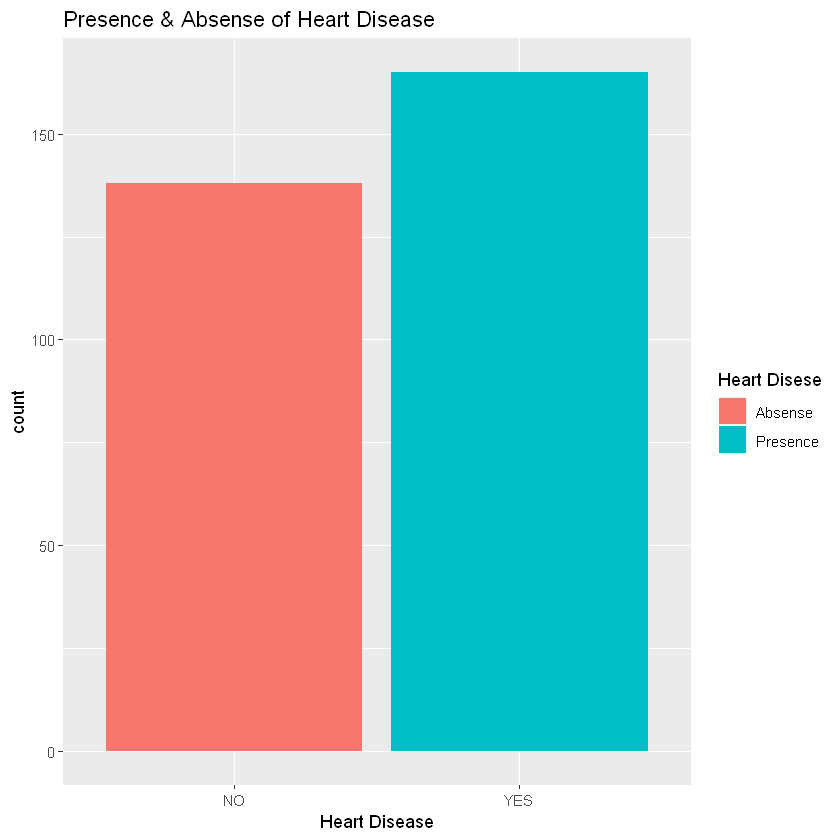

In [13]:
# Bar plot for target (heart disease)

ggplot(data2, aes(x=data2$target, fill=data2$target))+
    geom_bar()+
    xlab("Heart Disease")+
    ylab("count")+
    ggtitle("Presence & Absense of Heart Disease")+
    scale_fill_discrete(name= 'Heart Disese', label = c("Absense", "Presence"))

In [15]:
prop.table(table(data2$target))


       NO       YES 
0.4554455 0.5445545 

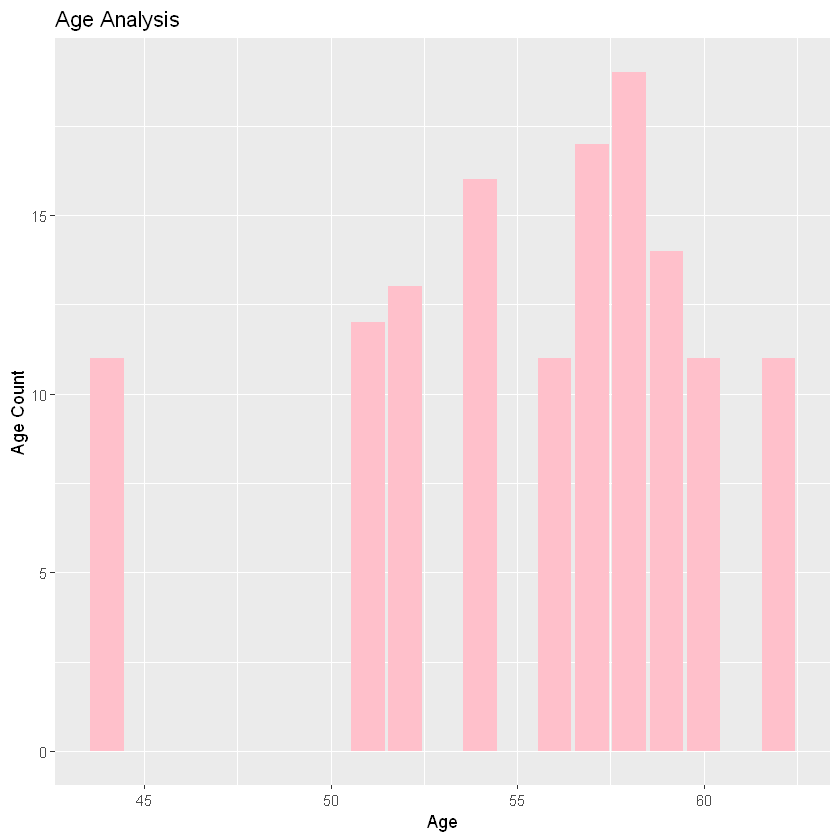

In [17]:
#count the frequency of the values of age

data2 %>%
  group_by(ï..age) %>%
  count() %>%
  filter(n>10) %>%
  ggplot()+
  geom_col(aes(ï..age, n), fill = 'pink')+
  ggtitle("Age Analysis")+
  xlab("Age")+
  ylab("Age Count")

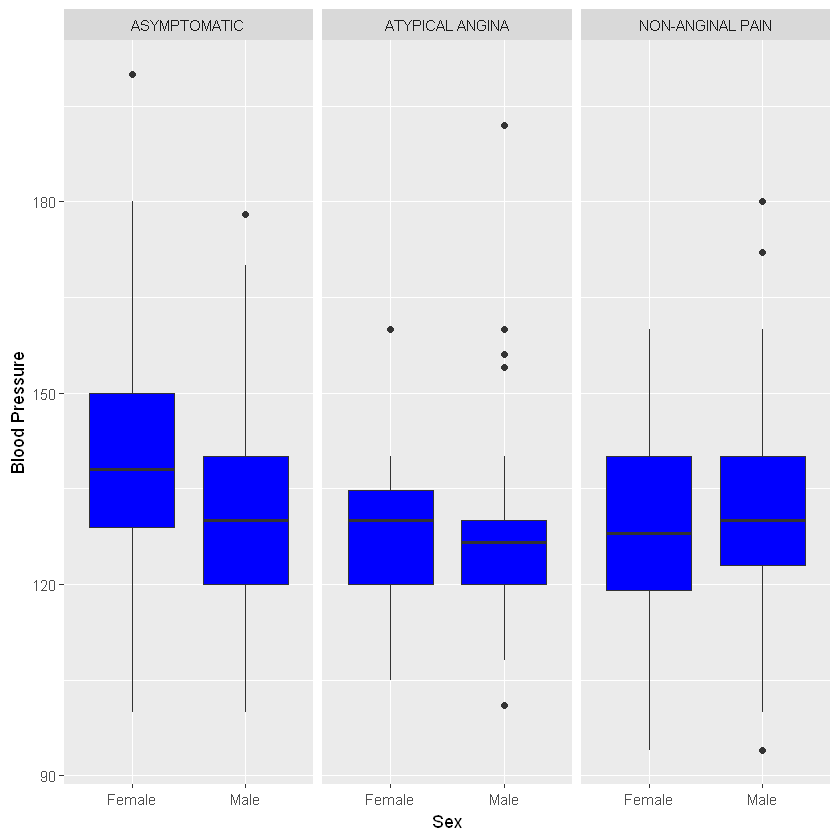

In [21]:
#compare blood pressure across the chest pain

data2 %>%
  ggplot(aes(x=sex, y=trestbps))+
  geom_boxplot(fill='blue')+
  xlab('Sex')+
  ylab('Blood Pressure')+
  facet_grid(~cp)

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

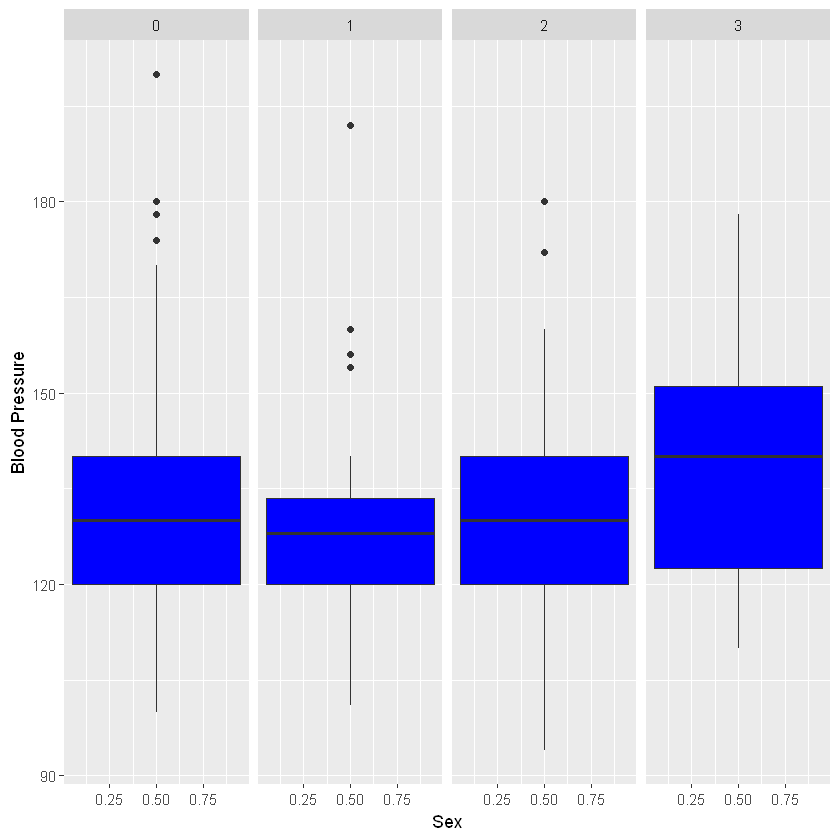

In [22]:
data %>%
  ggplot(aes(x=sex, y=trestbps))+
  geom_boxplot(fill='blue')+
  xlab('Sex')+
  ylab('Blood Pressure')+
  facet_grid(~cp)

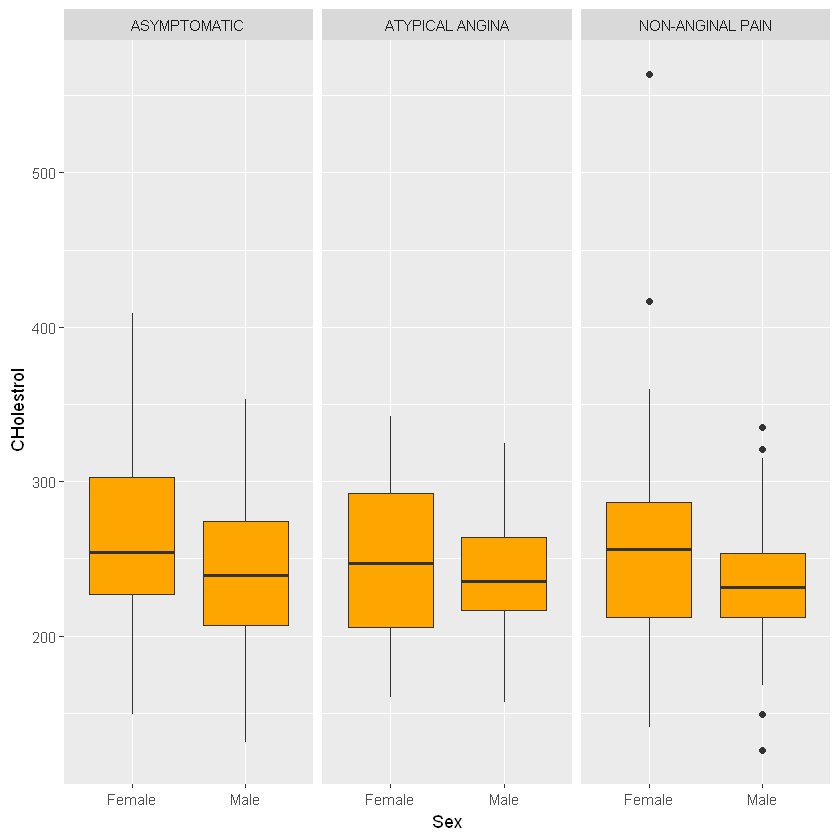

In [23]:
data2 %>%
  ggplot(aes(x=sex, y=chol))+
  geom_boxplot(fill='orange')+
  xlab('Sex')+
  ylab(' CHolestrol')+
  facet_grid(~cp)

# Correlation

In [25]:
install.packages("corrplot")
install.packages("ggplot2")


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.92             FALSE



installing the source package 'corrplot'

also installing the dependencies 'isoband', 'rlang'




  There are binary versions available but the source versions are later:
        binary source needs_compilation
isoband  0.2.4  0.2.5              TRUE
rlang   0.4.11  1.0.5              TRUE
ggplot2  3.3.3  3.3.6             FALSE

  Binaries will be installed
package 'isoband' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ASUS\AppData\Local\Temp\RtmpgJyNvP\downloaded_packages


installing the source package 'ggplot2'



In [26]:
library(corrplot)
library(ggplot2)

corrplot 0.92 loaded


,ï..age,trestbps,chol,thalach,oldpeak
ï..age,1.0000000,0.27935091,0.213677957,-0.398521938,0.21001257
trestbps,0.2793509,1.00000000,0.123174207,-0.046697728,0.19321647
chol,0.2136780,0.12317421,1.000000000,-0.009939839,0.05395192
thalach,-0.3985219,-0.04669773,-0.009939839,1.000000000,-0.34418695
oldpeak,0.2100126,0.19321647,0.053951920,-0.344186948,1.00000000


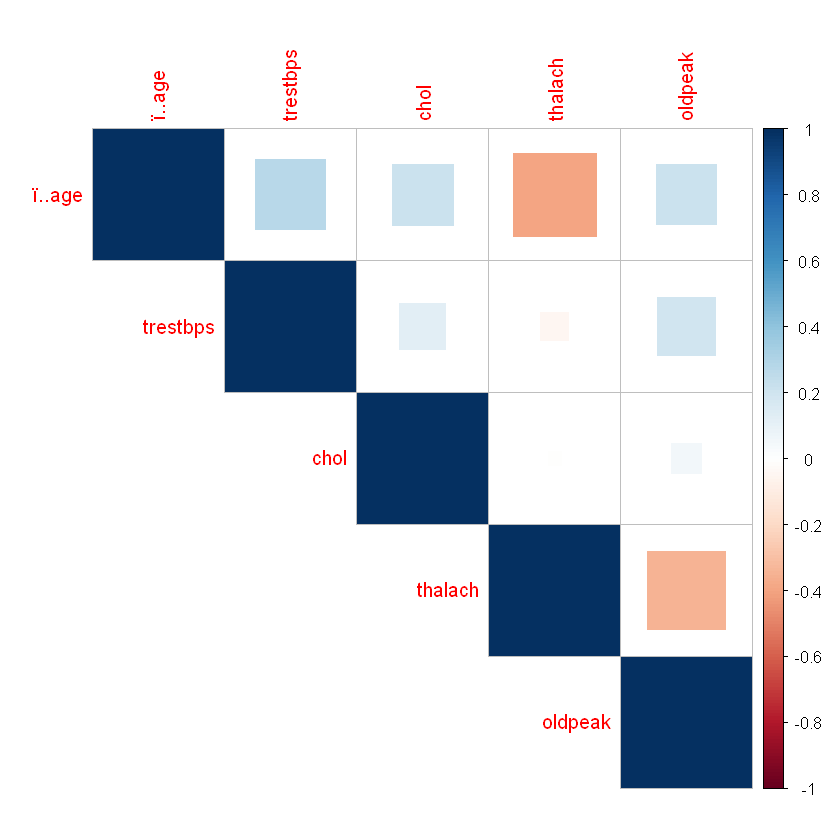

In [29]:
cor_heart <-cor(data2[,10:14])
cor_heart

corrplot(cor_heart, method ='square', type='upper')